In [1]:
import meep as mp
import matplotlib.pyplot as plt

resolution = 25   # pixels/μm

w1 = 1.0          # width of waveguide 1
w2 = 2.0          # width of waveguide 2
Lw = 10.0         # length of waveguides 1 and 2

# lengths of waveguide taper
Lts = [2**m for m in range(4)]

dair = 3.0        # length of air region
dpml_x = 6.0      # length of PML in x direction
dpml_y = 2.0      # length of PML in y direction

sy = dpml_y+dair+w2+dair+dpml_y

Si = mp.Medium(epsilon=12.0)

boundary_layers = [mp.PML(dpml_x,direction=mp.X),
                   mp.PML(dpml_y,direction=mp.Y)]

lcen = 6.67       # mode wavelength
fcen = 1/lcen     # mode frequency

symmetries = [mp.Mirror(mp.Y)]

R_coeffs = []   ###
R_flux = []     ###

Lt = Lts[0]

sx = dpml_x+Lw+Lt+Lw+dpml_x
cell_size = mp.Vector3(sx,sy,0)

src_pt = mp.Vector3(-0.5*sx+dpml_x+0.2*Lw)
sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen,fwidth=0.2*fcen),
                              center=src_pt,
                              size=mp.Vector3(y=sy-2*dpml_y),
                              eig_match_freq=True,
                              eig_parity=mp.ODD_Z+mp.EVEN_Y)]

# straight waveguide
vertices = [mp.Vector3(-0.5*sx-1,0.5*w1),
            mp.Vector3(0.5*sx+1,0.5*w1),
            mp.Vector3(0.5*sx+1,-0.5*w1),
            mp.Vector3(-0.5*sx-1,-0.5*w1)]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=boundary_layers,
                    geometry=[mp.Prism(vertices,height=mp.inf,material=Si)],
                    sources=sources,
                    symmetries=symmetries)

mon_pt = mp.Vector3(-0.5*sx+dpml_x+0.7*Lw)


flux = sim.add_flux(fcen,0,1,mp.FluxRegion(center=mon_pt,size=mp.Vector3(y=sy-2*dpml_y))) ###





-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00455594 s
Working in 2D dimensions.
Computational cell is 33 x 12 x 0 with resolution 25
     prism, center = (0,0,5e+19)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-17.5,0.5,0)
          (17.5,0.5,0)
          (17.5,-0.5,0)
          (-17.5,-0.5,0)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.396698 s
-----------
MPB solved for frequency_1(0.519356,0,0) = 0.176186 after 9 iters
MPB solved for frequency_1(0.424206,0,0) = 0.149878 after 7 iters
MPB solved for frequency_1(0.424377,0,0) = 0.149925 after 5 iters
MPB solved for frequency_1(0.424377,0,0) = 0.149925 after 1 iters


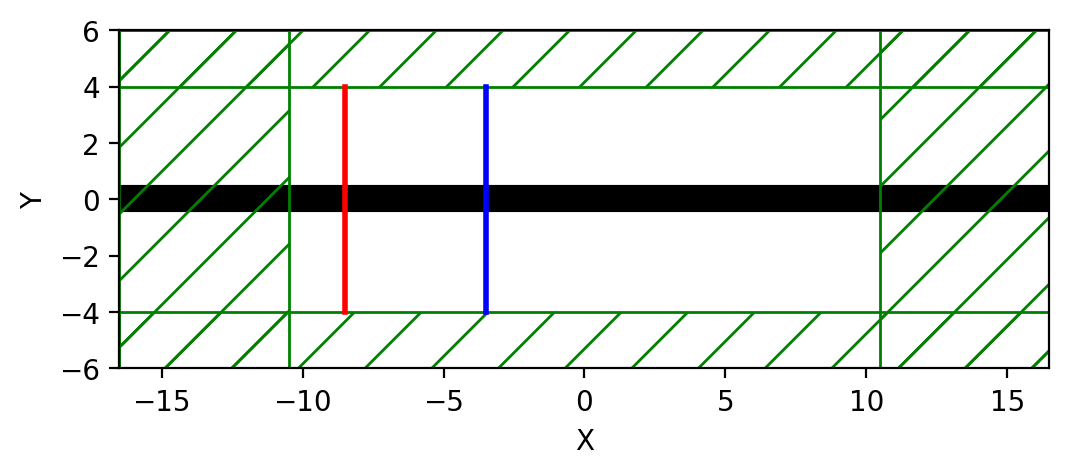

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=200)
sim.plot2D(plot_sources_flag=True,plot_monitors_flag=True,eps_parameters={'interpolation':'none'})
plt.show()

In [3]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,mon_pt,1e-9))

res = sim.get_eigenmode_coefficients(flux,[1],eig_parity=mp.ODD_Z+mp.EVEN_Y)
incident_coeffs = res.alpha
incident_flux = mp.get_fluxes(flux)
incident_flux_data = sim.get_flux_data(flux)


field decay(t = 50.02): 7.547409313337967e-08 / 7.547409313337967e-08 = 1.0
on time step 2992 (time=59.84), 0.00133705 s/step
field decay(t = 100.04): 0.001735614282175251 / 0.001735614282175251 = 1.0
on time step 6017 (time=120.34), 0.0013226 s/step
field decay(t = 150.06): 0.453978756917959 / 0.453978756917959 = 1.0
on time step 9067 (time=181.34), 0.00131153 s/step
field decay(t = 200.08): 1.5637205312091027 / 1.5637205312091027 = 1.0
on time step 12117 (time=242.34), 0.00131173 s/step
field decay(t = 250.1): 1.2378300815913292 / 1.5637205312091027 = 0.7915929073555183
field decay(t = 300.12): 0.031049012038052423 / 1.5637205312091027 = 0.019855857500345443
on time step 15170 (time=303.4), 0.00131042 s/step
field decay(t = 350.14): 8.86045069739368e-06 / 1.5637205312091027 = 5.666262302345412e-06
on time step 18222 (time=364.44), 0.00131082 s/step
field decay(t = 400.16): 2.7848020318637953e-11 / 1.5637205312091027 = 1.780882182131692e-11
run 0 finished at t = 400.16 (20008 timestep

In [4]:
print(incident_coeffs)

[[[22.54174281+24.59250578j -0.07208119 -0.07864032j]]]


In [5]:
print(incident_flux)

[1112.9271585030258]


In [8]:
print(res.)

[Vector3<0.4243768409807916, -0.0, 0.0>]
